# Bootstrap Variance Estimation

It is the year 2078, and humanity is in danger again, by a potential pandemic of a deadly virus that has arisen as a mutation of the plant pathogenic virus CeMV. Due to the fact that CeMV has been identified in coriander crops, it has been given name the Coriander virus. 

Scientists have discovered a potential vaccine for the Coriander virus. The data from the clinical trials have been collected; it records the amount of antibodies produced by every individual who participated in the trial.
The scientists found evidence that if the body produces at least the level of antibodies given by the median antibody level of the full original dataset, then that person is certain to be immune.
Unfortunetly, due to an accident most of the samples have been lost, only one rather small data set remains. 

You were asked to approximate the standard error of the median of the remaining data, since we have only have a few data points we may use bootstrap to create more `bootstrap-world' samples and approximate the standard error of the median. 

### Your tasks are:

- Please import the csv file "antibodies_data.csv" to a DataFrame and generate the corresponding histogram.
- Find the median of data set; recall that the median of a finite list of numbers is the middle number (or an average of two middle numbers if the length is even) given that this list of numbers has been ordered (from the smallest to greatest). You may use numpy/pandas for that. 
- The median is our statistic, $T_n = g(X_1, \ldots, X_n)$. we wish to estimate $\mathbb{V}[T_n]$ by using bootstrap algorithm. Your task in this exercise is to implement __Bootstrap variance estimation algorithm__ to approximate $\mathbb{V}[T_n]$.

#### Bootstrap variance estimation algorithm:
1. Draw  $X_1^*, X_2^*, \ldots, X_n^* \sim \widehat{F}_n$, where  $\widehat{F}_n(x) = \frac{1}{n} \sum_{i=1}^n I_{\{ X_i \leq x\}}$.
2. Compute $T_n^* = g(X_1^*, X_2^*, \ldots, X_n^*)$. 
3. Repeat i) and ii) $N$-times.
4.  Let the variance be
	$$ \large \nu_{{\tiny\mathrm{boot}}} = \frac{1}{N} \sum_{i=1}^N \left( T_{n,i}^* - \frac{1}{N} \sum_{j=1}^N T_{n,j}^* \right)^2, $$
	where $T_{n, j}^*$ is $T_n^*$ that has been computed from i) in step $j$ (out of $N$ steps).

Print your result with $N=50$. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_anti = pd.read_csv('Data/antibodies_data.csv') #imports the antibodies dataset
df_anti.head() #displays the header of the dataset

,antibodies level
0,1.415733
1,5.846716
2,2.180461
3,4.824895
4,5.413196


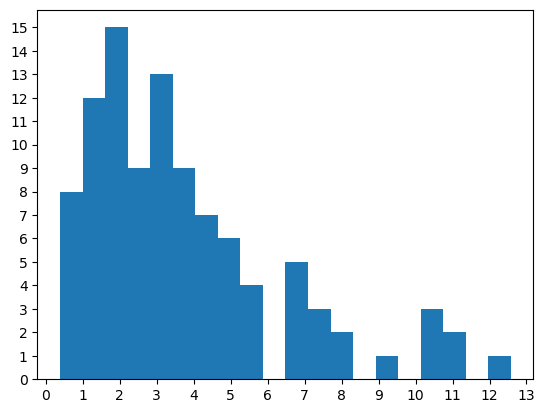

In [8]:
anti_num = df_anti['antibodies level'] #creates a list of all elements under the 'antibodies level' category
#plot formatting
plt.hist(anti_num, bins = 20)
plt.xticks(np.arange(0,14,1))
plt.yticks(np.arange(0,16,1))
plt.show()

In [9]:
print(np.median(anti_num))

3.08998112981717


In [10]:
#define a function that generates a list of medians of N bootstrapped datasets
def boot_med_gen(data,N): 
    boot_median = [] #creates empty list to append medians of bootstrapped samples
    for _ in range(N): #opens loop so we can repeat the following process N times
        boot_sample = np.random.choice(data, size=len(data), replace = True) #creates a new sample based on observed data
        boot_median.append(np.median(boot_sample)) #finds the median of the sample and appends it to the list
    return boot_median #returns the list of N medians from N samples

#define our bootstrap variance estimation algorithm
def boot_stat_var(boot_stat_list):
    N = len(boot_stat_list)
    sum_sq_dif = 0 #defines a variable for outer sum
    for i in range(N):
        stat_sum = 0 #defines a variable for inner sum
        for j in range(N):
            stat_sum += boot_stat_list[j] #sums list of bootsrapped stats
        sum_sq_dif += (boot_stat_list[i] - stat_sum/N)**2 #takes sum of the squared difference between each stat and the stat average
    return sum_sq_dif/N # peforms the final division by N
    
#  We run the above code with N=50 and compare to the built in variance function to check accuracy of algorithm      
solution = boot_med_gen(anti_num,50)
print(len(solution))
print(boot_stat_var(solution))
print(np.var(solution))

50
0.07792393145602493
0.07792393145602493
